# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [3]:
from xgboost import XGBClassifier
print("XGBClassifier imported successfully")

XGBClassifier imported successfully


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('diabetes.csv')


print(data.head())
print(data.isnull().sum())
X = data.drop('Diabetes', axis=1)  
y = data['Diabetes']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Розмір навчальної вибірки: {X_train.shape[0]}')
print(f'Розмір тестової вибірки: {X_test.shape[0]}')


   Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0   26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1   40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2   40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
3   43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
4   36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   

    CCR  FFPG  smoking  drinking  family_histroy  Diabetes  
0  63.8  5.40      3.0       3.0               0         0  
1  70.3  4.10      1.0       1.0               0         0  
2  61.1  4.85      3.0       3.0               0         0  
3  73.4  5.30      2.0       3.0               0         0  
4  67.5  5.53      3.0       3.0               0         0  
Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL              

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('diabetes.csv')
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Model")
print(f'Accuracy: {accuracy_score(y_test, y_pred_ada)}')
print(classification_report(y_test, y_pred_ada))



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model
Accuracy: 0.943089430894309
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861



In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=50,                               
    random_state=42
)


ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Model")
print(f'Accuracy: {accuracy_score(y_test, y_pred_ada)}')
print(classification_report(y_test, y_pred_ada))



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model
Accuracy: 0.943089430894309
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861



In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

gb_model = GradientBoostingClassifier(
    n_estimators=100,      
    learning_rate=0.1,     
    max_depth=3,           
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Model")
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Model
Accuracy: 0.9442508710801394
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861



In [9]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

cat_model = CatBoostClassifier(
    iterations=100,     
    learning_rate=0.1,    
    depth=3,             
    random_seed=42,
    verbose=0           
)

cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

print("CatBoost Model")
print(f'Accuracy: {accuracy_score(y_test, y_pred_cat)}')
print(classification_report(y_test, y_pred_cat))


CatBoost Model
Accuracy: 0.9465737514518002
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       624
           1       0.94      0.86      0.90       237

    accuracy                           0.95       861
   macro avg       0.95      0.92      0.93       861
weighted avg       0.95      0.95      0.95       861



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model
Train Accuracy: 0.9611
Test Accuracy: 0.9443


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


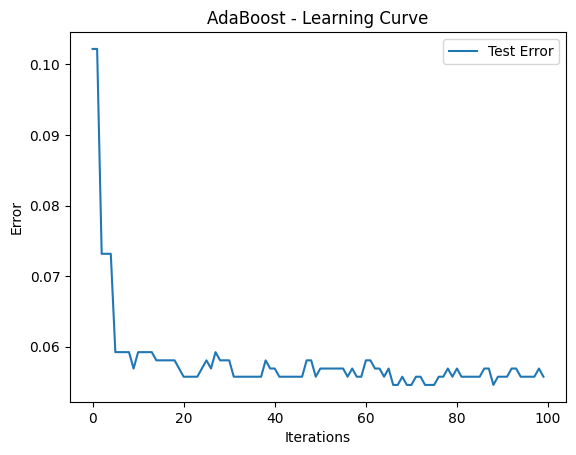

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost Model
Train Accuracy: 0.9625
Test Accuracy: 0.9466


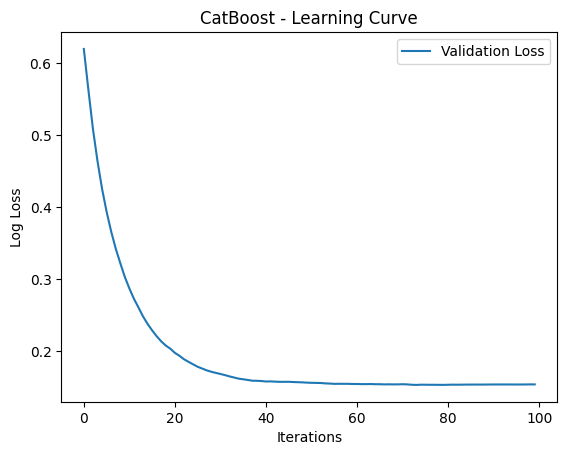

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n_estimators = 100
learning_rate = 0.1
max_depth = 3
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=n_estimators, 
    learning_rate=learning_rate, 
    random_state=42
)

cat_model = CatBoostClassifier(
    iterations=n_estimators, 
    learning_rate=learning_rate, 
    depth=max_depth, 
    random_seed=42, 
    verbose=0
)


def evaluate_and_plot(model, X_train, X_test, y_train, y_test, model_name):
  
    if model_name == 'CatBoost':
        model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0, plot=True)
    else:
        model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f'{model_name} Model')
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    if model_name == 'CatBoost':
        evals_result = model.get_evals_result()
        plt.plot(evals_result['validation']['Logloss'], label='Validation Loss')
        plt.title(f'{model_name} - Learning Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Log Loss')
        plt.legend()
        plt.show()

    if model_name == 'AdaBoost':
        errors = []
        for y_pred in model.staged_predict(X_test):
            errors.append(1 - accuracy_score(y_test, y_pred))

        plt.plot(errors, label='Test Error')
        plt.title(f'{model_name} - Learning Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Error')
        plt.legend()
        plt.show()

models = [
    ('AdaBoost', ada_model),
    ('CatBoost', cat_model)
]

for model_name, model in models:
    evaluate_and_plot(model, X_train, X_test, y_train, y_test, model_name)


In [11]:
from sklearn.model_selection import RandomizedSearchCV

ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 1.0]
}

ada_random_search = RandomizedSearchCV(
    estimator=ada_model,
    param_distributions=ada_params,
    n_iter=1, 
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
ada_random_search.fit(X_train, y_train)

print(f"Best parameters for AdaBoost: {ada_random_search.best_params_}")
print(f"Best accuracy for AdaBoost: {ada_random_search.best_score_}")

cat_params = {
    'iterations': [100, 200],
    'learning_rate': [0.1, 0.3],
    'depth': [4, 6]
}

cat_random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_params,
    n_iter=1, 
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
cat_random_search.fit(X_train, y_train)

print(f"Best parameters for CatBoost: {cat_random_search.best_params_}")
print(f"Best accuracy for CatBoost: {cat_random_search.best_score_}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

Best parameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 0.1}
Best accuracy for AdaBoost: 0.9549660934397363
Best parameters for CatBoost: {'learning_rate': 0.3, 'iterations': 100, 'depth': 4}
Best accuracy for CatBoost: 0.9572917584325924


In [14]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('diabetes.csv')
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting без регуляризації")
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')
print(classification_report(y_test, y_pred_gb))
xgb_model_no_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model_no_reg.fit(X_train, y_train)
y_pred_xgb_no_reg = xgb_model_no_reg.predict(X_test)

print("XGBoost без регуляризації")
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb_no_reg)}')
print(classification_report(y_test, y_pred_xgb_no_reg))

xgb_model_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, alpha=0.5, reg_lambda=0.5, random_state=42)
xgb_model_reg.fit(X_train, y_train)
y_pred_xgb_reg = xgb_model_reg.predict(X_test)

print("XGBoost з L1 (alpha) та L2 (lambda) регуляризацією")
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb_reg)}')
print(classification_report(y_test, y_pred_xgb_reg))


Gradient Boosting без регуляризації
Accuracy: 0.9442508710801394
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861

XGBoost без регуляризації
Accuracy: 0.943089430894309
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861

XGBoost з L1 (alpha) та L2 (lambda) регуляризацією
Accuracy: 0.9454123112659698
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.85     

In [16]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('diabetes.csv')
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{model_name} - Оцінка моделі")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

xgb_model_no_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model_no_reg.fit(X_train, y_train)
xgb_model_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, alpha=0.5, reg_lambda=0.5, random_state=42)
xgb_model_reg.fit(X_train, y_train)

evaluate_model(gb_model, X_test, y_test, "Gradient Boosting без регуляризації")
evaluate_model(xgb_model_no_reg, X_test, y_test, "XGBoost без регуляризації")
evaluate_model(xgb_model_reg, X_test, y_test, "XGBoost з L1 та L2 регуляризацією")



Gradient Boosting без регуляризації - Оцінка моделі
Accuracy: 0.9443
Precision: 0.9479
Recall: 0.8439
F1-Score: 0.8929
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861


XGBoost без регуляризації - Оцінка моделі
Accuracy: 0.9431
Precision: 0.9434
Recall: 0.8439
F1-Score: 0.8909
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861


XGBoost з L1 та L2 регуляризацією - Оцінка моделі
Accuracy: 0.9454
Precision: 0.9481
Recall: 0.8481
F1-Score: 0.895

In [19]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:45:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

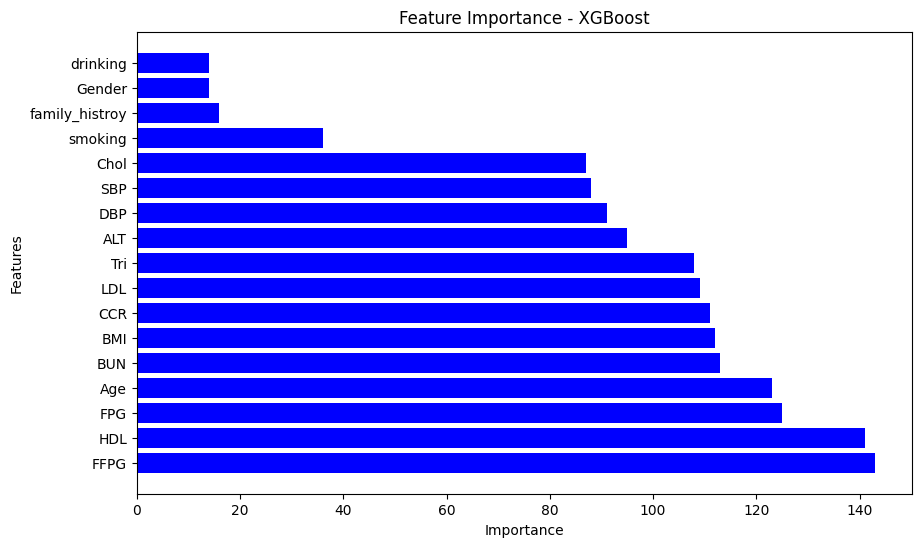

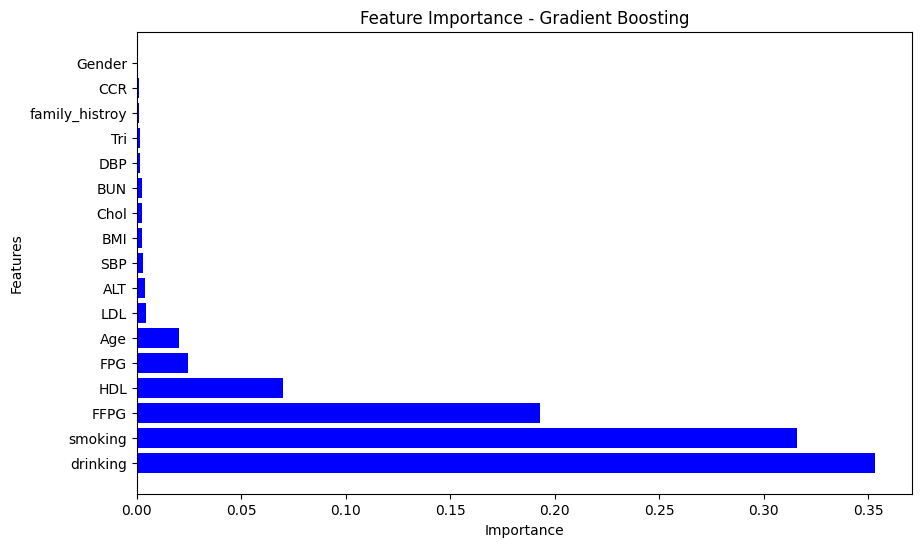

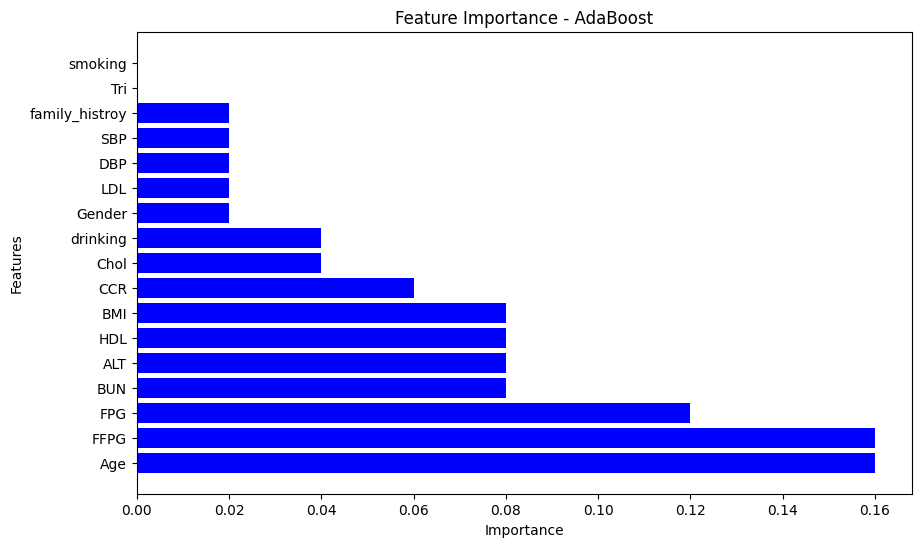

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

xgb_importance = xgb_model.get_booster().get_score(importance_type='weight')
xgb_importance = sorted(xgb_importance.items(), key=lambda x: x[1], reverse=True)

xgb_importance_df = pd.DataFrame(xgb_importance, columns=['Feature', 'Importance'])

gb_importance = gb_model.feature_importances_
gb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb_importance})
gb_importance_df = gb_importance_df.sort_values(by='Importance', ascending=False)
ada_importance = ada_model.feature_importances_
ada_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': ada_importance})
ada_importance_df = ada_importance_df.sort_values(by='Importance', ascending=False)
def plot_feature_importance(importance_df, model_name):
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

plot_feature_importance(xgb_importance_df, 'XGBoost')
plot_feature_importance(gb_importance_df, 'Gradient Boosting')
plot_feature_importance(ada_importance_df, 'AdaBoost')


Після аналізу результатів трьох моделей (Gradient Boosting, XGBoost без регуляризації, XGBoost з регуляризацією), найкращою моделлю для задачі може бути XGBoost з регуляризацією.
Gradient Boosting без регуляризації показує стандартну продуктивність.
XGBoost без регуляризації показує хорошу продуктивність.
Отже, найкращою моделлю для цієї задачі є XGBoost з регуляризацією, оскільки вона забезпечує високу продуктивність, мінімізує перенавчання і покращує узагальнюючу здатність.